#### Ketentuan

Tidak ada template khusus , justru di situ tantangannya . Pastikan bahwa slide yang kamu buat mencakup informasi berikut
1. Problem apa yang ingin diselesaikan
2. Dataset seperti apa yang dimiliki
3. Insight apa saja yang ditemukan dari data?
Bisa dijelaskan top 2 insights yang paling keren , dan tidak hanya dijelaskan insightnya apa , tetapi juga action apa yang
dapat dilakukan setelah mengetahui insight tersebut , karena tugas dari seorang data scientist tidak cukup hanya
memberikan insight namun harapannya insight tersebut dapat secara konkrit diwujudkan dalam bentuk action yang jelas
bagi perusahaan.
Contoh: PNS punya peluang lebih tinggi untuk diterima pengajuannya , yakni 75% pengajuan diterima . Tetapi secara
keseluruhan , hanya sekitar 12% pengajuan yang dari PNS. Maka kita perlu membuat campaign agar lebih banyak PNS yang
tertarik untuk mengajukan pinjaman
4. Apa saja yang telah dilakukan dalam membuat model. Tidak perlu dijelaskan eksperimen yang sudah dilakukan apa saja
, lebih fokus ke model final yang diperoleh . Itu pakai features apa saja , pre processingnya bagaimana , pakai algoritma apa ,
dsb . Lalu, performance nya bagaimana. Perbanyak referensi agar pemahamanmu lebih kaya, dan dapat memahami
usermu dengan lebih baik
5. Referensi dan Link GitHub Repo yang berisikan file ipynb pengerjaan tugas ini
6. Maksimal 10 halaman

### Description Columns

Link download **[data](https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/home-credit-indonesia/home-credit-default-risk.zip)**

- Target: 
    (0) Masalah Lainnya, (1) Klien telat membayar
- Name Contract Type:
    Identifikasi apakah pinjaman itu tunai atau bergulir
- Code Gender:
    Jenis kelamin klien
- Flag Own Car:
    Jika klien memiliki mobil
- Flag Own Reality:
    Jika klien memiliki rumah atau apartemen
- Count of Children:
    Banyaknya anak yang dimiliki
- Amount Income Total:
    Jumlah pendapatan klien
- Amount Credit:
    Jumlah kredit pinjaman
- Amount Annuity:
    Pinjaman berkala
- Amount Good Price:
    Harga barang yang diberikan pinjaman
- Name Education:
    Jenjang edukasi
- Name Housing Type:
    Situasi perumahan (pemiliki, sewa, tinggal dengan orang tua)
- Region Rating Client City
    Peringkat kota berdasarkan banyaknya klien yang diterima

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

In [2]:
# change directory
os.chdir("D:\Virtual Internship Home Credit - Data Science\home-credit-default-risk")

# list directory
os.listdir()

['application_test.csv',
 'application_train.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'HomeCredit_columns_description.csv',
 'installments_payments.csv',
 'POS_CASH_balance.csv',
 'previous_application.csv',
 'sample_submission.csv']

In [3]:
col = 'SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY CNT_CHILDREN AMT_INCOME_TOTAL AMT_CREDIT AMT_ANNUITY AMT_GOODS_PRICE NAME_EDUCATION_TYPE NAME_HOUSING_TYPE REGION_RATING_CLIENT_W_CITY'

# split into list
cols = col.split()


In [4]:
# import data
df = pd.read_csv('application_train.csv', usecols=cols)

# inspect data
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_RATING_CLIENT_W_CITY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Secondary / secondary special,House / apartment,2
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Higher education,House / apartment,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Secondary / secondary special,House / apartment,2
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Secondary / secondary special,House / apartment,2
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Secondary / secondary special,House / apartment,2


In [5]:
# tranform all column to lower case
df.columns = map(str.lower, df.columns)
df.columns

Index(['sk_id_curr', 'target', 'name_contract_type', 'code_gender',
       'flag_own_car', 'flag_own_realty', 'cnt_children', 'amt_income_total',
       'amt_credit', 'amt_annuity', 'amt_goods_price', 'name_education_type',
       'name_housing_type', 'region_rating_client_w_city'],
      dtype='object')

In [6]:
# info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   sk_id_curr                   307511 non-null  int64  
 1   target                       307511 non-null  int64  
 2   name_contract_type           307511 non-null  object 
 3   code_gender                  307511 non-null  object 
 4   flag_own_car                 307511 non-null  object 
 5   flag_own_realty              307511 non-null  object 
 6   cnt_children                 307511 non-null  int64  
 7   amt_income_total             307511 non-null  float64
 8   amt_credit                   307511 non-null  float64
 9   amt_annuity                  307499 non-null  float64
 10  amt_goods_price              307233 non-null  float64
 11  name_education_type          307511 non-null  object 
 12  name_housing_type            307511 non-null  object 
 13 

In [7]:
# check na/null values
df.isna().sum()

sk_id_curr                       0
target                           0
name_contract_type               0
code_gender                      0
flag_own_car                     0
flag_own_realty                  0
cnt_children                     0
amt_income_total                 0
amt_credit                       0
amt_annuity                     12
amt_goods_price                278
name_education_type              0
name_housing_type                0
region_rating_client_w_city      0
dtype: int64

In [8]:
# change value target 0=good, 1=bad for data train
df['target'] = np.where(df['target'] == 0, 'good', 'bad')

<AxesSubplot: xlabel='amt_credit', ylabel='Count'>

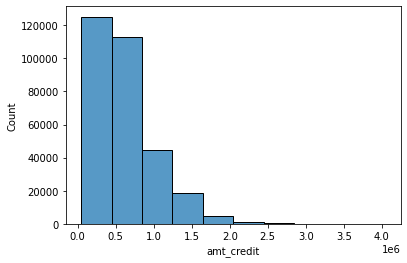

In [9]:
# distribution of amt good price
sns.histplot(df['amt_credit'], bins= 10)

<AxesSubplot: xlabel='amt_goods_price', ylabel='Count'>

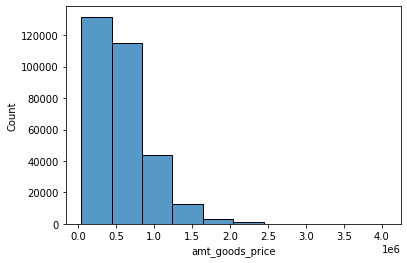

In [10]:
# distribution of amt good price
sns.histplot(df['amt_goods_price'], bins= 10)

<AxesSubplot: xlabel='amt_annuity', ylabel='Count'>

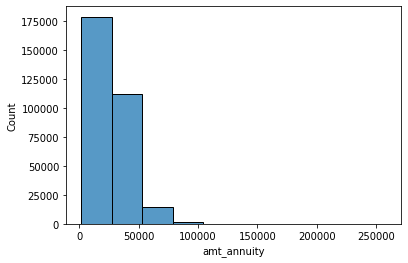

In [11]:
# distribution of amt annuity
sns.histplot(df['amt_annuity'], bins= 10)

In [12]:
# i decided median value cause is more safe and the distribution says skewneed. but whatever you choose mean or median the comparison of result is not far

# fill na values on amt good price with median value
df['amt_goods_price'].fillna(value= df['amt_goods_price'].median(), inplace=True)

# fill na values on amt annuity with median value
df['amt_annuity'].fillna(value= df['amt_annuity'].median(), inplace=True)

# info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   sk_id_curr                   307511 non-null  int64  
 1   target                       307511 non-null  object 
 2   name_contract_type           307511 non-null  object 
 3   code_gender                  307511 non-null  object 
 4   flag_own_car                 307511 non-null  object 
 5   flag_own_realty              307511 non-null  object 
 6   cnt_children                 307511 non-null  int64  
 7   amt_income_total             307511 non-null  float64
 8   amt_credit                   307511 non-null  float64
 9   amt_annuity                  307511 non-null  float64
 10  amt_goods_price              307511 non-null  float64
 11  name_education_type          307511 non-null  object 
 12  name_housing_type            307511 non-null  object 
 13 

In [13]:
# change data type float to int
for col in ['amt_income_total', 'amt_credit', 'amt_annuity', 'amt_goods_price']:
    df[col] = df[col].astype(int)

# inspect data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   sk_id_curr                   307511 non-null  int64 
 1   target                       307511 non-null  object
 2   name_contract_type           307511 non-null  object
 3   code_gender                  307511 non-null  object
 4   flag_own_car                 307511 non-null  object
 5   flag_own_realty              307511 non-null  object
 6   cnt_children                 307511 non-null  int64 
 7   amt_income_total             307511 non-null  int32 
 8   amt_credit                   307511 non-null  int32 
 9   amt_annuity                  307511 non-null  int32 
 10  amt_goods_price              307511 non-null  int32 
 11  name_education_type          307511 non-null  object
 12  name_housing_type            307511 non-null  object
 13  region_rating_

In [14]:
# filter only good credit
good_credit = df.loc[df['target'] == 'good'].copy()
good_credit

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_education_type,name_housing_type,region_rating_client_w_city
1,100003,good,Cash loans,F,N,N,0,270000,1293502,35698,1129500,Higher education,House / apartment,1
2,100004,good,Revolving loans,M,Y,Y,0,67500,135000,6750,135000,Secondary / secondary special,House / apartment,2
3,100006,good,Cash loans,F,N,Y,0,135000,312682,29686,297000,Secondary / secondary special,House / apartment,2
4,100007,good,Cash loans,M,N,Y,0,121500,513000,21865,513000,Secondary / secondary special,House / apartment,2
5,100008,good,Cash loans,M,N,Y,0,99000,490495,27517,454500,Secondary / secondary special,House / apartment,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,456249,good,Cash loans,F,N,Y,0,112500,225000,22050,225000,Secondary / secondary special,House / apartment,2
307506,456251,good,Cash loans,M,N,N,0,157500,254700,27558,225000,Secondary / secondary special,With parents,1
307507,456252,good,Cash loans,F,N,Y,0,72000,269550,12001,225000,Secondary / secondary special,House / apartment,2
307508,456253,good,Cash loans,F,N,Y,0,153000,677664,29979,585000,Higher education,House / apartment,3


Good vs Bad Credit

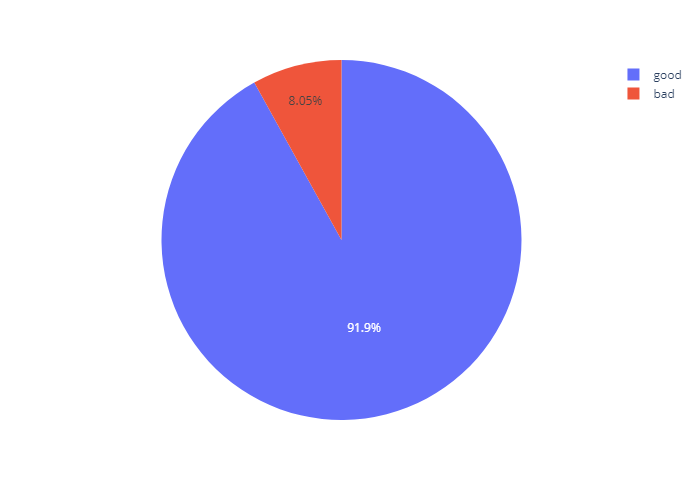

In [15]:
fig = px.pie(df, values='sk_id_curr', names='target')
fig.show(renderer='png')

#### percentage kontrak type

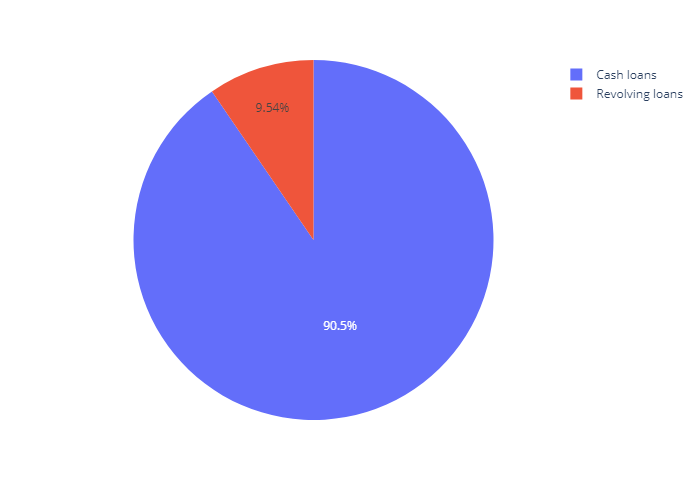

In [16]:
fig = px.pie(df, values='sk_id_curr', names='name_contract_type')
fig.show(renderer='png')

Boxplot to show distribution of amount credit only for good credit

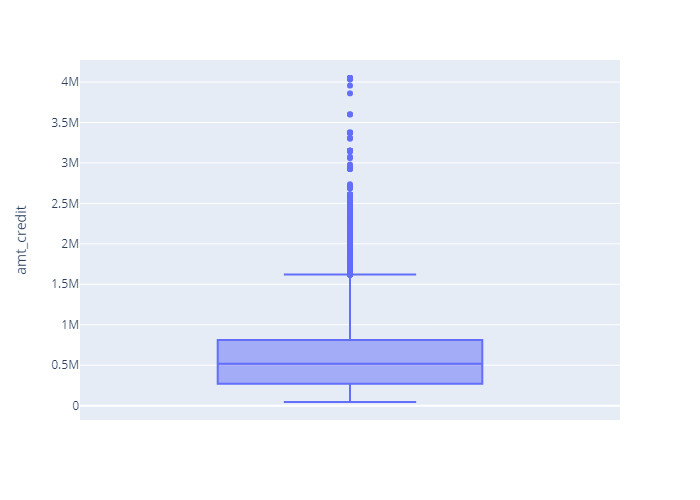

In [17]:
# distribution boxplot amount credit with boxplot (good credit)
fig = px.box(good_credit, y="amt_credit")
fig.show(renderer='png')

In [18]:
# remove the outlier
good_credit = good_credit[good_credit.amt_credit <= 3000000]

In [19]:
good_credit.code_gender.unique()

array(['F', 'M', 'XNA'], dtype=object)

In [20]:
# replace XNA to nan first
good_credit['code_gender'] = good_credit['code_gender'].replace('XNA', np.NaN)

<ipython-input-20-2994416bcd35>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
# replace XNA to mode code gender
good_credit['code_gender'].fillna(value=good_credit['code_gender'].mode(), inplace=True)

<ipython-input-21-a8302965cbe3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
# average loans creditby contract type
good_credit.groupby('name_contract_type')['amt_credit'].mean()

name_contract_type
Cash loans         632119.496057
Revolving loans    327939.024390
Name: amt_credit, dtype: float64

#### Trendlines show that amt credit and amt goods price have good correlation

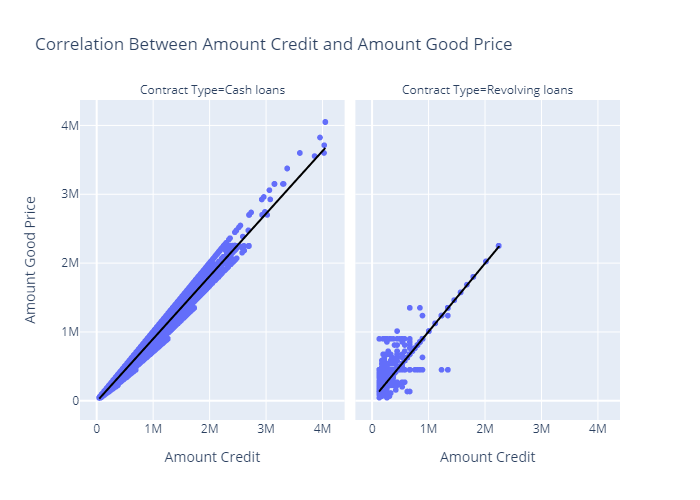

In [23]:
# corellation between amount credit and income total 
fig = px.scatter(df ,
                 x = "amt_credit",
                 y = "amt_goods_price",
                 facet_col = "name_contract_type",
                 labels = dict(amt_goods_price = "Amount Good Price",amt_credit = "Amount Credit", name_contract_type = 'Contract Type'),
                 title='Correlation Between Amount Credit and Amount Good Price',
                 trendline="ols",
                #  trendline_scope="overall",
                 trendline_color_override="black")
fig.show(renderer='png')

In [24]:
df.groupby(['name_contract_type','target'])['sk_id_curr'].count()

name_contract_type  target
Cash loans          bad        23221
                    good      255011
Revolving loans     bad         1604
                    good       27675
Name: sk_id_curr, dtype: int64

In [25]:
(29279/307511)

0.09521285417432222

In [26]:
# Kategorisasi rata-rata besar transaksi
def credit_group(row):
    if row > 0 and row < 500000:
        return 'below 500k'
    elif row >= 500000 and row < 1000000:
        return '500k-1m'
    elif row > 1000000 and row < 2000000:
        return '>1m-2m'
    elif row > 2000000 and row < 3000000:
        return '>2m-3m'
    elif row > 3000000 and row < 4000000:
        return '>3m-4m'
    else:
        return 'above 4m'

df['amt_credit_group'] = df['amt_credit'].apply(credit_group)
good_credit['amt_credit_group'] = good_credit['amt_credit'].apply(credit_group)
        

<ipython-input-26-292f0df58b55>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Distribution of Amount Credit Group by Contract Type

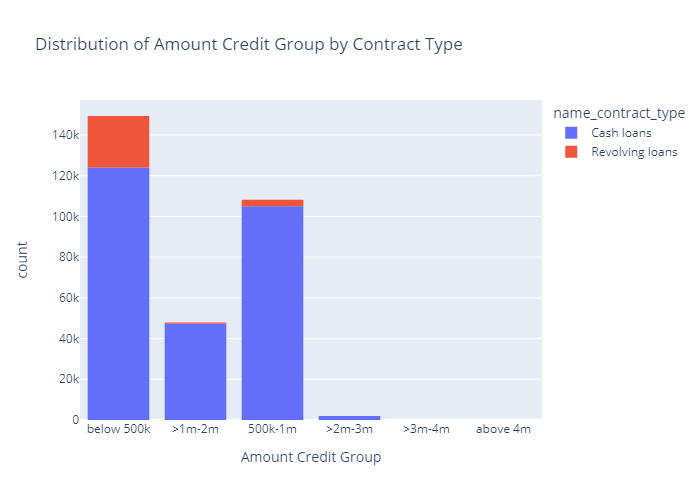

In [27]:
# Distribution of Amount Credit Group by Contract Type
fig = px.histogram(df,
                   x = 'amt_credit_group',
                   histfunc='count',
                   color= 'name_contract_type',
                   title= 'Distribution of Amount Credit Group by Contract Type',
                   labels= dict(amt_credit_group = 'Amount Credit Group', sk_id_curr = 'Count User'),
                   nbins=5)
fig.show(renderer='png')

#### Distribution of Amount Credit Group by Target

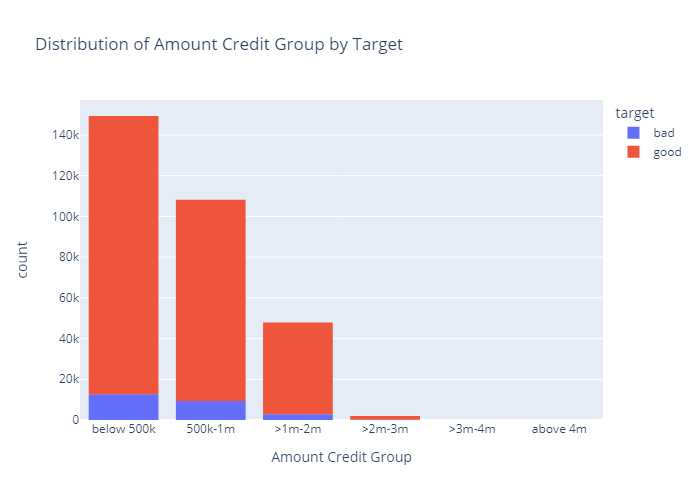

In [28]:
# total user by contract type and amount credit group only for good credit
fig = px.histogram(df,
                   x = 'amt_credit_group',
                   color= 'target',
                   histfunc='count',
                   title= 'Distribution of Amount Credit Group by Target',
                   labels= dict(amt_credit_group = 'Amount Credit Group', sk_id_curr = 'Count User'),
                   nbins=5)
fig.show(renderer='png')

### Splitting Data

In [29]:
# upsampling
# from sklearn.utils import resample
# bad_upsample = resample(bad,
#              replace=True,
#              n_samples=len(good),
#              random_state=42)
# print(bad_upsample.shape)
# data_upsampled = pd.concat([good, bad_upsample])

In [30]:
# before splitting, cause logistics only can model with numeric data so let's cahange value contract type

# change value name_contract_type 0=revolvingloans, 1=cashloans for data test
df['name_contract_type'] = np.where(df['name_contract_type'] == 'Cash Loans', 1, 0)

In [31]:
# Nama-nama feature columns
feature_columns = ['amt_income_total', 'amt_credit', 'amt_annuity', 'amt_goods_price']

# Features variable
X = df[feature_columns] 

# Target variable
y = df['target'] 

In [32]:
# import module
from sklearn.model_selection import train_test_split

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 0)

In [33]:
# test with using logistic regression (it because the target is non-numerik)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Inisiasi model logreg
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# Predict model
y_pred = logreg.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[    0  7340]
 [    0 84914]]


<Figure size 432x288 with 0 Axes>

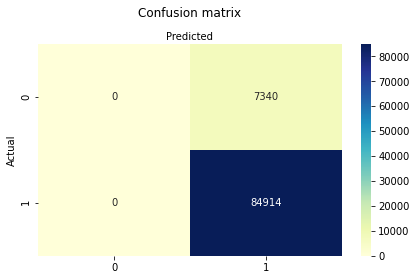

In [34]:
# visualize the confusion matrix
plt.clf()
# name  of classes
class_names = ['good', 'bad'] 
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

### Result indicates that data is overfitting

In [35]:
# find the Accuracy, Precision, dan Recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.9204370542198712
Precision: 0.9204370542198712
Recall : 0.9204370542198712


### Try downsampling

In [36]:
# look at label values
df['target'].value_counts()

good    282686
bad      24825
Name: target, dtype: int64

In [37]:
# downsampling
good = df[df['target'] == 'good']
bad = df[df['target'] == 'bad']

from sklearn.utils import resample
good_downsample = resample(good,
             replace=True,
             n_samples=len(bad),
             random_state=42)

print(good_downsample.shape)

(24825, 15)


In [38]:
data_downsample = pd.concat([bad,good_downsample])
data_downsample.target.value_counts()

bad     24825
good    24825
Name: target, dtype: int64

In [44]:
fig = px.pie(data_downsample, values='sk_id_curr', names= 'target')
fig.show()

In [39]:
# Nama-nama feature columns
feature_columns = ['amt_income_total', 'amt_credit', 'amt_annuity', 'amt_goods_price']

# Features variable
X = data_downsample[feature_columns] 

# Target variable
y = data_downsample['target'] 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

# fit the model with data
logreg.fit(X_train, y_train)

# Predict model
y_pred = logreg.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[2959 1994]
 [2541 2436]]


In [41]:
#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.5433031218529708
Precision: 0.5433031218529708
Recall : 0.5433031218529708


In [42]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth =3, random_state = 42)

clf.fit(X_train, y_train)

# Predict model
y_pred = clf.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)


Confusion Matrix:
 [[1881 3072]
 [1361 3616]]


In [43]:
#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.5535750251762336
Precision: 0.5535750251762336
Recall : 0.5535750251762336
